#Hemang Monga
#ML-MINOR-MARCH.
#To expose the best combination for strategy games available in the AppStore in order to get a good user rating (4.0/5.0 and above).


In [164]:
#importing all the necessary libraries.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
sns.set_style('darkgrid')

In [165]:
#Reading the required dataset as a dataframe.
df = pd.read_csv('appstore_games.csv')
#Dropping unnecessary columns, and setting Name as the index.
df = (df.drop(['URL', 'ID', 'Subtitle', 'Icon URL', 'Description'], axis = 1)).set_index('Name')
#Filling 0 in the missing places for In-app Purchases.
df['In-app Purchases'] = df['In-app Purchases'].fillna(0)
df

,Average User Rating,User Rating Count,Price,In-app Purchases,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date
Name,,,,,,,,,,,,
Sudoku,4.0,3553.0,2.99,0,Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.0,Games,"Games, Strategy, Puzzle",11/07/2008,30/05/2017
Reversi,3.5,284.0,1.99,0,Kiss The Machine,4+,EN,12328960.0,Games,"Games, Strategy, Board",11/07/2008,17/05/2018
Morocco,3.0,8376.0,0.00,0,Bayou Games,4+,EN,674816.0,Games,"Games, Board, Strategy",11/07/2008,5/09/2017
Sudoku (Free),3.5,190394.0,0.00,0,Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",21552128.0,Games,"Games, Strategy, Puzzle",23/07/2008,30/05/2017
Senet Deluxe,3.5,28.0,2.99,0,RoGame Software,4+,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",34689024.0,Games,"Games, Strategy, Board, Education",18/07/2008,22/07/2018
...,...,...,...,...,...,...,...,...,...,...,...,...
Stack Puzzle : Rise Tower,NaN,NaN,0.00,0,Zhigang Pei,4+,EN,64795648.0,Games,"Games, Entertainment, Casual, Strategy",30/07/2019,30/07/2019
EachOther,NaN,NaN,0.00,0,Sultan Shindi,4+,EN,110341120.0,Games,"Games, Family, Strategy",1/08/2019,1/08/2019
Rabbit Vs Tortoise,NaN,NaN,0.00,0,Vishal Baldha,4+,EN,23207936.0,Games,"Games, Strategy",3/08/2019,3/08/2019


In [166]:
#checking all the missing values in all the column.
df.isna().sum()

Average User Rating             9446
User Rating Count               9446
Price                             24
In-app Purchases                   0
Developer                          0
Age Rating                         0
Languages                         60
Size                               1
Primary Genre                      0
Genres                             0
Original Release Date              0
Current Version Release Date       0
dtype: int64

In [174]:
#Dropping all the null values for data cleaning.
df = df.dropna()
df1 = df.copy()

#Converting necessary column to time data format.
df1['Current Version Release Date'] = pd.to_datetime(df1['Current Version Release Date'], dayfirst= True)

#Dropping rows where Average user rating is < 4, User rating count <200,
    #and keeping only those rows where Primary Genre is Games and then dropping that column too.
df1 = df1[df1['Average User Rating'] >= 4] 
df1 = df1[df1['User Rating Count'] >= 200]
df1 = (df1[df1['Primary Genre'] == 'Games']).drop(['Primary Genre'], axis = 1)

#Dropping rows which has current version Release Date in the past 6 months.
df1 = df1[df1['Current Version Release Date'] < '2019-10-27']

#Replacing Games, Entertainment, Strategy with ''.
df1['Genres'] = df1['Genres'].str.replace(',', '').str.replace('Games', '').str.replace('Entertainment', '').str.replace('Strategy', '') 
df1['Genres'] = df1['Genres'].str.split(' ').map(lambda x: ' '.join(sorted(x)))
df1

,Average User Rating,User Rating Count,Price,In-app Purchases,Developer,Age Rating,Languages,Size,Genres,Original Release Date,Current Version Release Date
Name,,,,,,,,,,,
Sudoku,4.0,3553.0,2.99,0,Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.0,Puzzle,11/07/2008,2017-05-30
Boomshine,4.0,637.0,0.99,0,TwoDesk Software Company,4+,EN,22873088.0,Puzzle,7/10/2008,2017-05-20
Fieldrunners,4.0,41869.0,2.99,"0.99, 0.99, 0.99, 0.99","Subatomic Studios, LLC",9+,EN,75041792.0,Action,5/10/2008,2018-04-11
Expert Sudoku,4.0,523.0,2.99,0,Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",9543680.0,Puzzle,21/10/2008,2017-05-30
Chess - tChess Pro,4.0,3062.0,7.99,0,Tom Kerrigan,4+,"EN, FR, DE, JA, KO, ZH",7517184.0,Board,5/11/2008,2019-04-07
...,...,...,...,...,...,...,...,...,...,...,...
Smash Brickz Pro,4.5,354.0,0.00,"9.99, 4.99, 4.99, 2.99, 9.99, 0.99, 1.99, 2.99...",Hong Kong JoyTap Limited,4+,EN,211398656.0,Puzzle,11/06/2019,2019-07-28
Car Wash Empire,5.0,658.0,0.00,2.99,Ksenia Aprelkova,4+,EN,206372864.0,Puzzle,5/06/2019,2019-07-30
Idle Zoo Tycoon 3D,4.5,1197.0,0.00,0,Marine Parker,12+,EN,131396608.0,Action,3/07/2019,2019-08-01


In [176]:
#Dropping rows which contains Genre other than these, like Cards, Casino, etc.
Non_Main_Genre=df1[~df1.Genres.str.contains('Puzzle') & \
                           ~df1.Genres.str.contains('Action') & \
                           ~df1.Genres.str.contains('Family')& \
                           ~df1.Genres.str.contains('Education')& \
                           ~df1.Genres.str.contains('Family')& \
                           ~df1.Genres.str.contains('Adventure')&\
                           ~df1.Genres.str.contains('Board')&\
                           ~df1.Genres.str.contains('Role')].index
df1.drop(Non_Main_Genre , inplace=True)

In [177]:
#For better Understanding, Grouping Categories.
df1.loc[df1['Genres'].str.contains('Puzzle'),'Genres'] = 'Puzzle'
df1.loc[df1['Genres'].str.contains('Board'),'Genres'] = 'Puzzle'
df1.loc[df1['Genres'].str.contains('Action'),'Genres'] = 'Action'
df1.loc[df1['Genres'].str.contains('Adventure'),'Genres'] = 'Adventure'
df1.loc[df1['Genres'].str.contains('Role'),'Genres'] = 'Adventure'
df1.loc[df1['Genres'].str.contains('Family'),'Genres'] = 'Family'
df1.loc[df1['Genres'].str.contains('Education'),'Genres'] = 'Family'

Text(0.5, 1.0, 'Total no. of games per Genre\n')

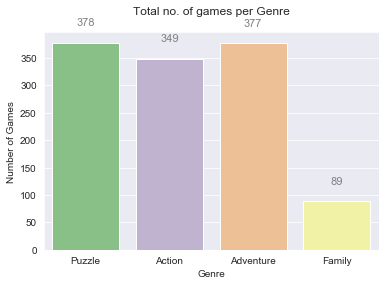

In [146]:
#Plotting a histogram between genre and No. of Games.
x=['Puzzle','Action','Adventure','Family']
y = [df1.Genres[(df1['Genres']=='Puzzle')].count(),df1.Genres[(df1['Genres']=='Action')].count(), df1.Genres[(df1['Genres']=='Adventure')].count(),df1.Genres[(df1['Genres']=='Family')].count()]

ax1= sns.barplot(x,y,palette='Accent')
ax1.set(xlabel='Genre',ylabel='Number of Games')

for p in ax1.patches:
    ax1.annotate("%.f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=11, color='gray', xytext=(0, 20), textcoords='offset points')

plt.title('Total no. of games per Genre\n')

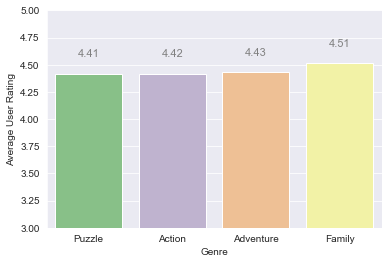

In [147]:
# Plotting a Histogram between Average User Rating and Genre.
x=['Puzzle','Action','Adventure','Family']
y = [df1['Average User Rating'][(df1['Genres']=='Puzzle')].mean(),\
     df1['Average User Rating'][(df1['Genres']=='Action')].mean(),\
     df1['Average User Rating'][(df1['Genres']=='Adventure')].mean(),\
     df1['Average User Rating'][(df1['Genres']=='Family')].mean()]

ax2= sns.barplot(x,y,palette='Accent')
ax2.set(xlabel='Genre',ylabel='Average User Rating')
ax2.set(ylim=(3,5))


for p in ax2.patches:
    ax2.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=11, color='gray', xytext=(0, 20),
                 textcoords='offset points')

# plt.show()

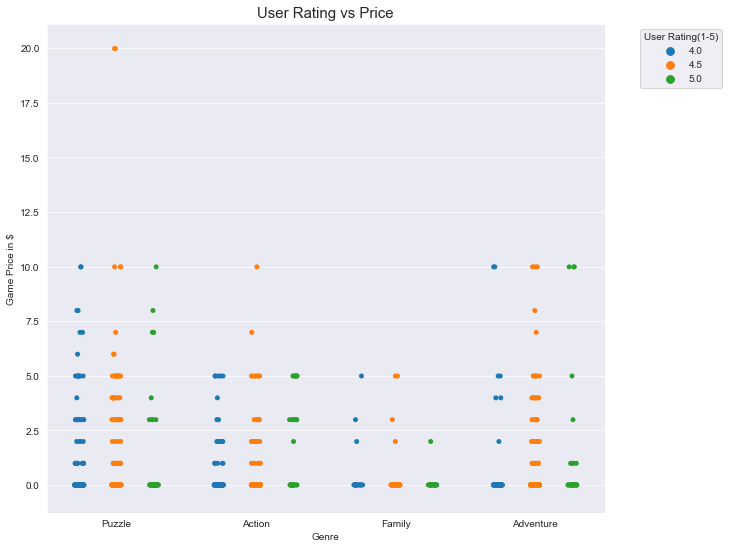

In [180]:
#Plotting a stripplot between Price, Genre and User Rating. 
ax3 = sns.stripplot(y=df1.Price, x=df1.Genres, data=df1,hue=df1['Average User Rating'], dodge=1)
ax3.set(xlabel='Genre',ylabel='Game Price in $')
plt.title('User Rating vs Price',fontsize=15)
plt.legend(title='User Rating(1-5)',bbox_to_anchor=(1.22, 1))
fig = plt.gcf()
fig.set_size_inches(10, 9)


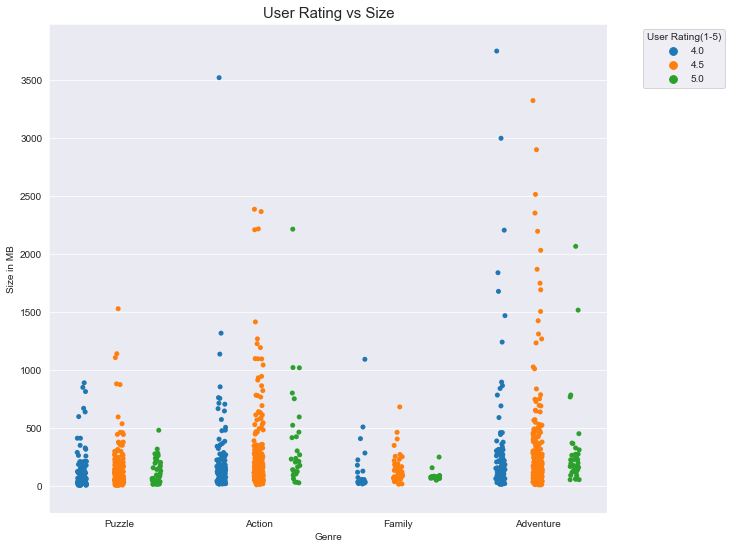

In [184]:
#Plotting a stripplot between Size, Genre and User Rating. 
df1['Size2'] = round(df1['Size']/1000000,1)
ax4 = sns.stripplot(y=df1.Size2, x=df1.Genres, data=df1,hue=df1['Average User Rating'], dodge=1)
ax4.set(xlabel='Genre',ylabel='Size in MB')
plt.title('User Rating vs Size',fontsize=15)
plt.legend(title='User Rating(1-5)',bbox_to_anchor=(1.22, 1))
fig = plt.gcf()
fig.set_size_inches(10, 9)


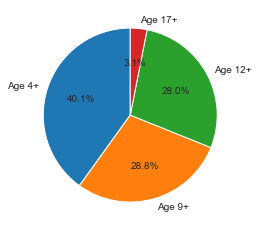

In [189]:
#Plotting a Pie Chart for Age Rating and no.of people playing the games.
GR = [df1['Age Rating'][(df1['Age Rating']=='4+')].count(),df1['Age Rating'][(df1['Age Rating']=='9+')].count(),\
     df1['Age Rating'][(df1['Age Rating']=='12+')].count(),df1['Age Rating'][(df1['Age Rating']=='17+')].count()]
AR = ['Age 4+','Age 9+','Age 12+','Age 17+']

plt.pie(GR, labels=AR, startangle=90, autopct='%.1f%%')
plt.show()

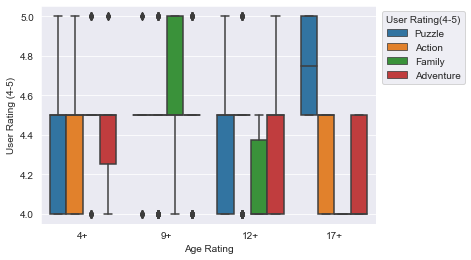

In [190]:
#Plotting a box plot.
ax5 = sns.boxplot(x=df1['Age Rating'], y=df1['Average User Rating'], data=df1, hue=df1.Genres, dodge=True)

ax5.set(xlabel='Age Rating',ylabel='User Rating (4-5)')
plt.legend(title='User Rating(4-5)',bbox_to_anchor=(1.28, 1))
plt.ioff()

Inferences Made:
1. For Simpler Games, keep a Size of less than 250MB as can be seen from the graph above, all genres of games having size less    than 250MB get a rating of more than 4.
2. For Adventure Games, you can increase the size also since it is the only genre which gets significant amount of rating of      more than 4 even for games which larger size as compared.
3. Family Games are the least popular genre of games, with minimum no of people rating them more than 4.
4. People tend to invest money in all the genres except Family.
5. For more no. of people to rate a rating of more than 4, try to keep the price of the game in the range($0-$5).
6. Family Games with age rating 9+ receive excellent rating.
7. Puzzle games eith age rating 17+ also receive excellent rating.
8. And In general on an average Family Games has the highest user rating.